# Problem 1

- Решите задачу 1 из прошлого задания методом сопряженных градиентов. Реализуйте вырианты для $\beta_k$ https://en.wikipedia.org/wiki/Nonlinear_conjugate_gradient_method. Сравните методы на примере графиков сходимости.

- Решите задачу 1 из прошлого задания методом сопряженных градиентов c предобуславлевателем и разными вариантами $\beta_k$. Объясните выбор предобуславлевателя.

- Попробуйте методы, которые были на семинаре, сравните сходимости.

In [1]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from IPython.display import Audio

def Fletcher_Reeves(A, b):
  x = np.zeros_like(b)
  r = b - A @ x
  p = np.copy(r)
  it = 0
  res = []
  res.append(np.linalg.norm(r))
  while it < 100:
    it +=1
    a = (r.dot(r))/((A @ p).dot(p))
    x = x + a*p
    beta = 1./(r.dot(r))
    r = r - a*(A @ p)
    res.append(np.linalg.norm(r))
    beta *= r.dot(r)
    p = r + beta*p

  return x, res

def Polak(A, b):
  x = np.zeros_like(b)
  r = b - A @ x
  p = np.copy(r)
  it = 0
  res = []
  res.append(np.linalg.norm(r))
  while it < 100:
    it +=1
    a = (r.dot(r))/((A @ p).dot(p))
    x = x + a*p
    r_prev = np.copy(r)
    r = r - a*(A @ p)
    res.append(np.linalg.norm(r))
    beta = (r.dot(r - r_prev))/(r_prev.dot(r_prev))
    p = r + beta*p

  return x, res

def Hestenes(A, b):
  x = np.zeros_like(b)
  r = b - A @ x
  p = np.copy(r)
  it = 0
  res = []
  res.append(np.linalg.norm(r))
  while it < 100:
    it +=1
    a = (r.dot(r))/((A @ p).dot(p))
    x = x + a*p
    r_prev = np.copy(r)
    r = r - a*(A @ p)
    res.append(np.linalg.norm(r))
    beta = -(r.dot(r - r_prev))/(p.dot(r - r_prev))
    p = r + beta*p

  return x, res

def Dai(A, b):
  x = np.zeros_like(b)
  r = b - A @ x
  p = np.copy(r)
  it = 0
  res = []
  res.append(np.linalg.norm(r))
  while it < 100:
    it +=1
    a = (r.dot(r))/((A @ p).dot(p))
    x = x + a*p
    r_prev = np.copy(r)
    r = r - a*(A @ p)
    res.append(np.linalg.norm(r))
    beta = -(r.dot(r))/(p.dot(r - r_prev))
    p = r + beta*p

  return x, res



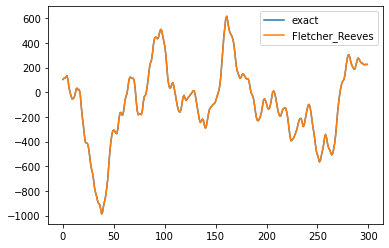

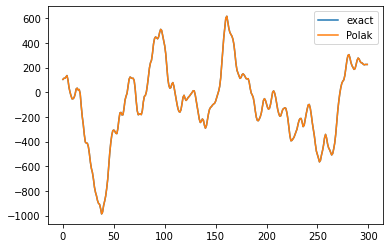

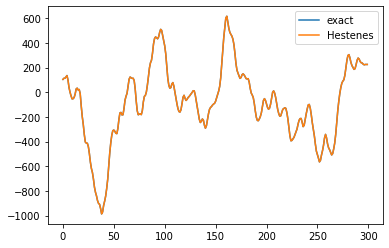

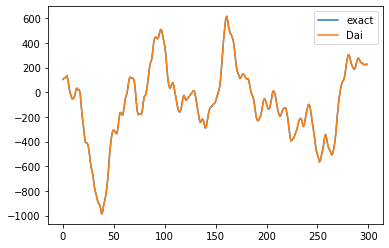

In [3]:
all_sound = wav.read('imperial_march.wav')
data = [all_sound[0], all_sound[1][15098:15398]]

def f_2(n, m): #for alpha = 0.2
  res = (0.2/np.pi)**0.5*np.exp(-0.2*(n - m)**2)
  return res


size = 300
T = np.fromfunction(f_2, (size, size), dtype = np.float32)
conv_2 = T @ data[1]

res_flet, steps_flet = Fletcher_Reeves(T, conv_2)
res_polak, steps_polak = Polak(T, conv_2)
res_hest, steps_hest = Hestenes(T, conv_2)
res_dai, steps_dai = Dai(T, conv_2)

plt.plot(data[1], label='exact')
plt.plot(res_flet, label='Fletcher_Reeves')
plt.legend()
plt.show()

plt.plot(data[1], label='exact')
plt.plot(res_polak, label='Polak')
plt.legend()
plt.show()

plt.plot(data[1], label='exact')
plt.plot(res_hest, label='Hestenes')
plt.legend()
plt.show()

plt.plot(data[1], label='exact')
plt.plot(res_dai, label='Dai')
plt.legend()
plt.show()